<a href="https://colab.research.google.com/github/Malmiquer/Deploy-Aplication/blob/main/Projeto_classificacao_defeitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classificação de defeitos em Chapas de Aço Inox**




In [90]:
!pip install pandas numpy scikit-learn matplotlib seaborn xgboost

##1. **Preparação Inicial**

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score




##2. **Verificação da Base de Dados**



In [200]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [202]:
df_train = pd.read_csv('/content/bootcamp_train - bootcamp_train.csv')


In [203]:
df_test = pd.read_csv('/content/bootcamp_test - bootcamp_test.csv')

In [204]:
print(df_train.shape)

(3390, 39)


In [205]:
print(df_test.shape)

(389, 32)


In [206]:
df_train.head()

,id,x_minimo,x_maximo,y_minimo,y_maximo,peso_da_placa,area_pixels,perimetro_x,perimetro_y,soma_da_luminosidade,...,indice_de_luminosidade,sigmoide_das_areas,minimo_da_luminosidade,falha_1,falha_2,falha_3,falha_4,falha_5,falha_6,falha_outros
0,0,154,169.0,260124,260136,100,75,27,17,9948.0,...,0.0362,0.3068,125,FALSE,0,False,FALSE,não,False,Sim
1,1,1121,-186.0,1789332,1789337,100,-206,9,-194,2240.0,...,0.0294,0.1441,115,FALSE,FALSE,False,TRUE,Não,False,Não
2,2,41,216.0,2708878,2708939,100,6298,275,134,654634.0,...,-0.1879,1.0000,42,FALSE,FALSE,True,FALSE,não,False,Não
3,3,129,157.0,86408,86427,100,276,39,26,33858.0,...,-0.0416,0.8223,115,FALSE,FALSE,True,FALSE,não,False,Não
4,4,436,442.0,4959398,530985,100,63,17,17,6374.0,...,-0.2096,0.2083,90,FALSE,TRUE,False,FALSE,Não,False,Não


In [207]:
df_test.head()

,id,x_minimo,x_maximo,y_minimo,y_maximo,peso_da_placa,area_pixels,perimetro_x,perimetro_y,soma_da_luminosidade,...,indice_de_variacao_x,indice_de_variacao_y,indice_global_externo,log_das_areas,log_indice_x,log_indice_y,indice_de_orientaçao,indice_de_luminosidade,sigmoide_das_areas,minimo_da_luminosidade
0,3390,1117,1154,1194359,1194414,100,1055,69,56,110262,...,0.057686,-0.133439,1.0,3.0233,1.5682,1.7404,0.3273,-0.1835,1.0000,72
1,3391,1572,1610,337559,337645,100,1570,176,128,128770,...,-0.640601,0.166042,1.0,3.1959,1.5798,1.9345,0.5581,-0.3592,1.0000,29
2,3392,1617,1628,2095494,2095507,100,89,14,13,7804,...,0.358265,0.598848,1.0,1.9494,1.0414,1.1139,0.1539,-0.3150,0.2570,77
3,3393,1317,1324,2166062,2166078,100,78,12,16,9381,...,-0.094189,-0.078787,1.0,1.8921,0.8451,1.2041,0.5625,-0.0604,0.2195,110
4,3394,386,394,1304617,1304626,100,51,10,9,5795,...,-0.017035,0.382024,1.0,1.7076,0.9031,0.9542,0.1111,-0.1123,0.1773,100


In [208]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            3390 non-null   int64  
 1   x_minimo                      3390 non-null   int64  
 2   x_maximo                      3334 non-null   float64
 3   y_minimo                      3390 non-null   int64  
 4   y_maximo                      3390 non-null   int64  
 5   peso_da_placa                 3390 non-null   int64  
 6   area_pixels                   3390 non-null   int64  
 7   perimetro_x                   3390 non-null   int64  
 8   perimetro_y                   3390 non-null   int64  
 9   soma_da_luminosidade          3290 non-null   float64
 10  maximo_da_luminosidade        3292 non-null   float64
 11  comprimento_do_transportador  3390 non-null   int64  
 12  tipo_do_aço_A300              3390 non-null   object 
 13  tip

In [209]:
print(df_train.isnull().sum())

id                                0
x_minimo                          0
x_maximo                         56
y_minimo                          0
y_maximo                          0
peso_da_placa                     0
area_pixels                       0
perimetro_x                       0
perimetro_y                       0
soma_da_luminosidade            100
maximo_da_luminosidade           98
comprimento_do_transportador      0
tipo_do_aço_A300                  0
tipo_do_aço_A400                 76
espessura_da_chapa_de_aço        41
temperatura                       0
index_de_bordas                   0
index_vazio                       0
index_quadrado                   36
index_externo_x                   0
indice_de_bordas_x                0
indice_de_bordas_y                0
indice_de_variacao_x              0
indice_de_variacao_y              0
indice_global_externo            59
log_das_areas                     0
log_indice_x                      0
log_indice_y                

##3. **Análise Exploratória dos Dados**

## A partir  dos resultados aprentados, observa-se que existem algumas colunas com valores do tipo string e boleanos, além de outras colunas que apresentam variações de colunas nulas.
##Esses valores podem influenciar na análise e nos resultados btidos. Como solução, tem-se a seguinte verificação:
  
  


---


### *  Prenchimento das colunas que apresentam valores nulos;
### *  Modificação das strings e dos boleanos para tipo numericos



In [211]:
colunas_falhas = ['falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6', 'falha_outros']

Coluna 'falha_1' tinha 67 valores não reconhecidos. Foram convertidos para 0.
Coluna 'falha_1' convertida para inteiro com sucesso.
Coluna 'falha_2' tinha 10 valores não reconhecidos. Foram convertidos para 0.
Coluna 'falha_2' convertida para inteiro com sucesso.
Coluna 'falha_3' (bool) convertida para inteiro.
Coluna 'falha_4' tinha 67 valores não reconhecidos. Foram convertidos para 0.
Coluna 'falha_4' convertida para inteiro com sucesso.
Coluna 'falha_5' convertida para inteiro com sucesso.
Coluna 'falha_6' (bool) convertida para inteiro.
Coluna 'falha_outros' convertida para inteiro com sucesso.


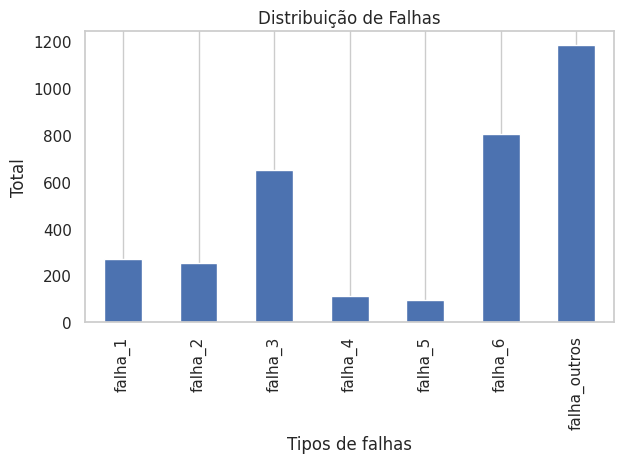

In [212]:
# Verificar e converter colunas de falhas para tipo numérico
for col in colunas_falhas:
    col_dtype = df_train[col].dtype

    # Se for string ou objeto, tenta converter
    if col_dtype == 'object' or col_dtype == 'string':
        # Valores que representam "verdadeiro, para palavras representadas em Sim, representar com o valor 1, e para palavras com Não, representar com o valor 0"
        true_values = ['1', 'yes', 'sim', 'true', 'True']
        false_values = ['0', 'no', 'não', 'false', 'False']

        # Converte para string, padroniza, depois para 0/1
        df_train[col] = df_train[col].astype(str).str.lower().map(
            lambda x: 1 if x in true_values else 0 if x in false_values else None
        )

        # Substitui valores não reconhecidos por 0 e avisa
        num_missing = df_train[col].isna().sum()
        if num_missing > 0:
            print(f"Coluna '{col}' tinha {num_missing} valores não reconhecidos. Foram convertidos para 0.")
            df_train[col] = df_train[col].fillna(0)

        df_train[col] = df_train[col].astype(int)
        print(f"Coluna '{col}' convertida para inteiro com sucesso.")

    elif col_dtype == 'bool':
        df_train[col] = df_train[col].astype(int)
        print(f"Coluna '{col}' (bool) convertida para inteiro.")

    elif not pd.api.types.is_numeric_dtype(df_train[col]):
        print(f"Aviso: Coluna '{col}' não é numérica e não pôde ser convertida automaticamente.")

# Gerar gráfico de barras da soma das colunas (0 = não falha, 1 = falha)
df_train[colunas_falhas].sum().plot(kind='bar', title='Distribuição de Falhas')
plt.xlabel('Tipos de falhas')
plt.ylabel('Total')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [213]:
print(df_train.describe()) #verificação dos valores medios, mediana e quartis

                id      x_minimo    x_maximo      y_minimo      y_maximo  \
count  3390.000000   3390.000000  3334.00000  3.390000e+03  3.390000e+03   
mean   1694.500000    995.507375   605.90012  2.692640e+06  1.592301e+06   
std     978.753033   1796.737709   548.07724  5.625693e+06  1.821345e+06   
min       0.000000    -11.000000  -186.00000 -2.000000e+01 -1.660000e+02   
25%     847.250000     41.000000   179.00000  3.934352e+05  3.407380e+05   
50%    1694.500000    614.000000   544.00000  1.265462e+06  1.128297e+06   
75%    2541.750000   1187.500000  1090.00000  2.555025e+06  2.184335e+06   
max    3389.000000  15266.000000  1713.00000  1.041366e+08  1.291709e+07   

       peso_da_placa    area_pixels  perimetro_x   perimetro_y  \
count         3390.0    3390.000000  3390.000000   3390.000000   
mean           100.0    1566.317699    66.733923     47.261062   
std              0.0    4337.683975   195.092105    336.794632   
min            100.0    -206.000000  -229.000000   

## 4. **Pré-Processamento**

## Verificando a Aplicação

In [214]:
df_train.head()

,id,x_minimo,x_maximo,y_minimo,y_maximo,peso_da_placa,area_pixels,perimetro_x,perimetro_y,soma_da_luminosidade,...,indice_de_luminosidade,sigmoide_das_areas,minimo_da_luminosidade,falha_1,falha_2,falha_3,falha_4,falha_5,falha_6,falha_outros
0,0,154,169.0,260124,260136,100,75,27,17,9948.0,...,0.0362,0.3068,125,0,0,0,0,0,0,1
1,1,1121,-186.0,1789332,1789337,100,-206,9,-194,2240.0,...,0.0294,0.1441,115,0,0,0,1,0,0,0
2,2,41,216.0,2708878,2708939,100,6298,275,134,654634.0,...,-0.1879,1.0000,42,0,0,1,0,0,0,0
3,3,129,157.0,86408,86427,100,276,39,26,33858.0,...,-0.0416,0.8223,115,0,0,1,0,0,0,0
4,4,436,442.0,4959398,530985,100,63,17,17,6374.0,...,-0.2096,0.2083,90,0,1,0,0,0,0,0


In [215]:
#Aqui estamos definindo uma lista de colunas-alvo (targets), que correspondem a tipos de falhas que queremos prever.
#É comum em problemas de classificação multirrótulo (multi-label classification), onde cada amostra pode ter mais de uma falha.
target_cols = ['falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6', 'falha_outros']
X = df_train.drop(columns=['id'] + target_cols)
y = df_train[target_cols]

In [216]:
# Check the data types of the columns in X before scaling
print("Data types of columns in X before scaling:")
print(X.dtypes)

# Identify non-numeric columns in X
non_numeric_cols_X = X.select_dtypes(exclude=np.number).columns
print(f"\nNon-numeric columns in X: {list(non_numeric_cols_X)}")

for col in non_numeric_cols_X:
    print(f"\nInspecting column: {col}")
    # Print unique values to understand the content
    print(X[col].unique())
    try:

        X[col] = pd.to_numeric(X[col], errors='coerce')
        print(f"Attempted to convert column '{col}' to numeric.")
        # After converting non-numeric to NaN, you might need to fill NaNs
        # X[col] = X[col].fillna(X[col].median()) # Example: fill with median
    except Exception as e:
        print(f"Could not convert column '{col}' to numeric: {e}")

# Re-check data types after attempted conversion
print("\nData types of columns in X after conversion attempt:")
print(X.dtypes)

# Now attempt to scale again
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Data types of columns in X before scaling:
x_minimo                          int64
x_maximo                        float64
y_minimo                          int64
y_maximo                          int64
peso_da_placa                     int64
area_pixels                       int64
perimetro_x                       int64
perimetro_y                       int64
soma_da_luminosidade            float64
maximo_da_luminosidade          float64
comprimento_do_transportador      int64
tipo_do_aço_A300                 object
tipo_do_aço_A400                 object
espessura_da_chapa_de_aço       float64
temperatura                     float64
index_de_bordas                 float64
index_vazio                     float64
index_quadrado                  float64
index_externo_x                 float64
indice_de_bordas_x              float64
indice_de_bordas_y              float64
indice_de_variacao_x            float64
indice_de_variacao_y            float64
indice_global_externo           float

In [191]:
# # Identify non-numeric columns in X_test
# non_numeric_cols_X_test = X_test.select_dtypes(exclude=np.number).columns
# print(f"\nNon-numeric columns in X_test before cleaning: {list(non_numeric_cols_X_test)}")

# # Apply the same cleaning logic as applied to X
# for col in non_numeric_cols_X_test:
#     print(f"\nInspecting column in X_test: {col}")
#     # Print unique values to understand the content
#     print(X_test[col].unique())
#     try:
#         # Attempt to convert to numeric, coercing errors to NaN
#         X_test[col] = pd.to_numeric(X_test[col], errors='coerce')
#         print(f"Attempted to convert column '{col}' in X_test to numeric.")
#         # You might also want to handle NaNs in X_test if you decided to fill them in X
#         # Example: X_test[col] = X_test[col].fillna(X_test[col].median())
#     except Exception as e:
#         print(f"Could not convert column '{col}' in X_test to numeric: {e}")

# # Re-check data types after attempted conversion for X_test
# print("\nData types of columns in X_test after conversion attempt:")
# print(X_test.dtypes)

# # Now attempt to scale X_test again after cleaning
# X_test_scaled = scaler.transform(X_test)

In [218]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [219]:
model = MultiOutputClassifier(RandomForestClassifier(random_state=42))
model.fit(X_train, y_train)


MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42))

In [194]:
y_pred = model.predict(X_val)
print("Relatório de Classificação:")
print(classification_report(y_val, y_pred, target_names=target_cols))


Relatório de Classificação:
              precision    recall  f1-score   support

     falha_1       0.33      0.04      0.08        47
     falha_2       0.92      0.73      0.81        45
     falha_3       0.97      0.93      0.95       168
     falha_4       0.94      0.71      0.81        21
     falha_5       0.71      0.26      0.38        19
     falha_6       0.62      0.32      0.42       159
falha_outros       0.64      0.49      0.56       215

   micro avg       0.78      0.54      0.64       674
   macro avg       0.73      0.50      0.57       674
weighted avg       0.73      0.54      0.61       674
 samples avg       0.54      0.54      0.54       674



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [220]:
# Agrupar por faixa etária e localização e contar os clientes
grouped_df = df_train.groupby(['temperatura', 'falha_1']).size().reset_index(name='Quantidade de Falhas')
# Visualizar os dados agrupados
grouped_df

,temperatura,falha_1,Quantidade de Falhas
0,45.801848,0,1
1,47.578441,0,1
2,48.460099,0,1
3,48.592264,0,1
4,48.630556,0,1
...,...,...,...
3385,110.597063,0,1
3386,111.411093,0,1
3387,112.672202,0,1
3388,113.718208,0,1


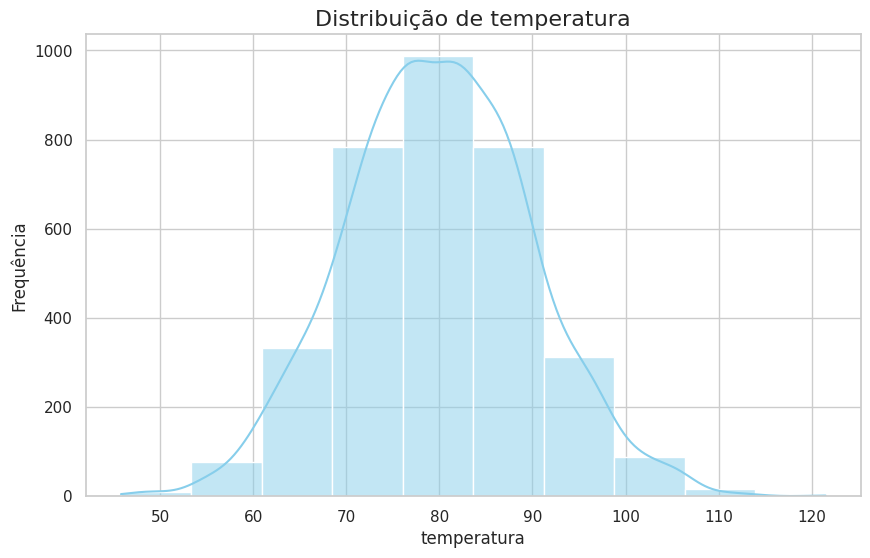

In [221]:
# Configurando estilo para os gráficos
sns.set(style="whitegrid")

# Gráfico 1: Distribuição de Idades
plt.figure(figsize=(10, 6))
sns.histplot(df_train["temperatura"], bins=10, kde=True, color="skyblue")
plt.title("Distribuição de temperatura", fontsize=16)
plt.xlabel("temperatura", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.show()
#A temperatura não tem influencia nas falhas

<ipython-input-222-5a8981ad518c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="temperatura", y="tipo_do_aço_A300", data=df_train, palette="coolwarm")


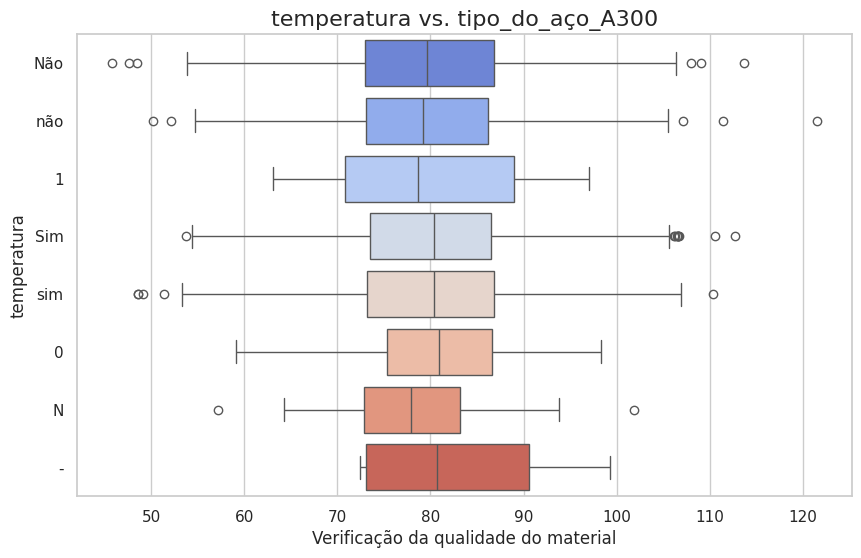

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico 3: Idades vs. Anos de Registro
plt.figure(figsize=(10, 6))
sns.boxplot(x="temperatura", y="tipo_do_aço_A300", data=df_train, palette="coolwarm")
plt.title("temperatura vs. tipo_do_aço_A300", fontsize=16)
plt.xlabel("Verificação da qualidade do material", fontsize=12)
plt.ylabel("temperatura", fontsize=12)
plt.show()

In [ ]:
#tarazer grafico de correlação


In [223]:
y_test_pred = model.predict(X_test_scaled)
df_predictions = pd.DataFrame(y_test_pred, columns=target_cols)
df_predictions['id'] = df_test['id']
df_predictions = df_predictions[['id'] + target_cols]

df_predictions.to_csv('predicoes.csv', index=False)


In [199]:
from google.colab import files
files.download('predicoes.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>